# Assignment

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the file
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#checking for null values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
#checking for duplicated values
data[data.duplicated()].shape

(0, 5)

In [10]:
#reading the columns names
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [12]:
data1 = data.copy()
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
#Copying the df and renaming the columns
data1 = data1.rename({'R&D Spend':'RnD_Spend','Marketing Spend':'Marketing_Spend'},axis=1)
data1.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [17]:
data1.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
#reading the uniques values in a particular column
data1['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [21]:
#Checking whether data is balanced or not
data1['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

<AxesSubplot: >

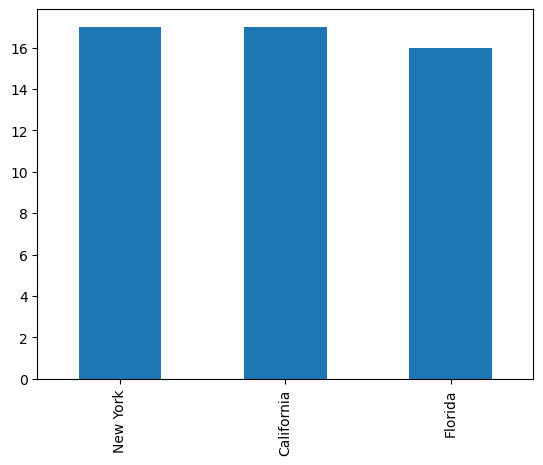

In [22]:
value_counts = data1['State'].value_counts()
value_counts.plot.bar()

Checking for outliers

In [25]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Profit')

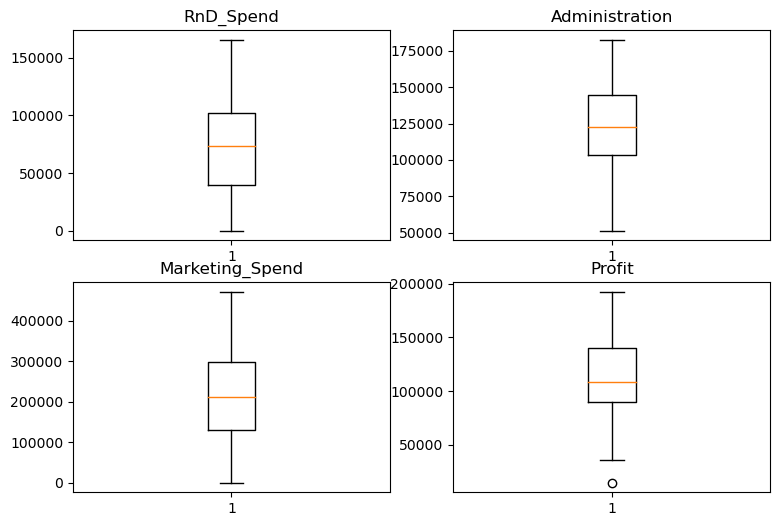

In [28]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.boxplot(data1['RnD_Spend'])
plt.title('RnD_Spend')
plt.subplot(222)
plt.boxplot(data1['Administration'])
plt.title('Administration')
plt.subplot(223)
plt.boxplot(data1['Marketing_Spend'])
plt.title('Marketing_Spend')
plt.subplot(224)
plt.boxplot(data1['Profit'])
plt.title('Profit')

In [30]:
#we can see there is one outlier in Profit feature
#here there is only one outlier so we can say the outlier by taking min value of that particular column
data1['Profit'].min()

14681.4

In [32]:
data1.loc[data1['Profit'] == data1['Profit'].min()]

,RnD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


#But it will not be same for all the cases So lets find out the outliers by another method

In [34]:
Q1 = np.quantile(data1.Profit,0.25)
Q3 = np.quantile(data1.Profit,0.75)
IQR = Q3-Q1
UL = Q3+(1.5*IQR)
LL = Q1-(1.5*IQR)

In [38]:
outliers  = data1.Profit[(data1.Profit <= LL) | (data1.Profit >= UL)]
print(outliers)

49    14681.4
Name: Profit, dtype: float64


In [44]:
data2 = data1.copy()
data2.drop([49],inplace=True)

In [55]:
data2.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [56]:
#State data is balanced already we checked above
#So we are remloving the State Column
data2.drop(labels=['State'],axis=1,inplace=True)

In [57]:
data2.columns

Index(['RnD_Spend', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

In [58]:
data2.shape

(49, 4)

Removed the outlier in the Profit

Text(0.5, 1.0, 'Profit')

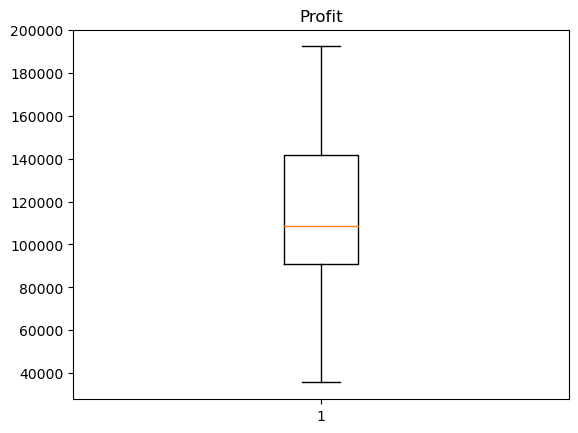

In [59]:
plt.boxplot(data2['Profit'])
plt.title('Profit')

ScatterPlots between variables
Knowing the relation between varianles

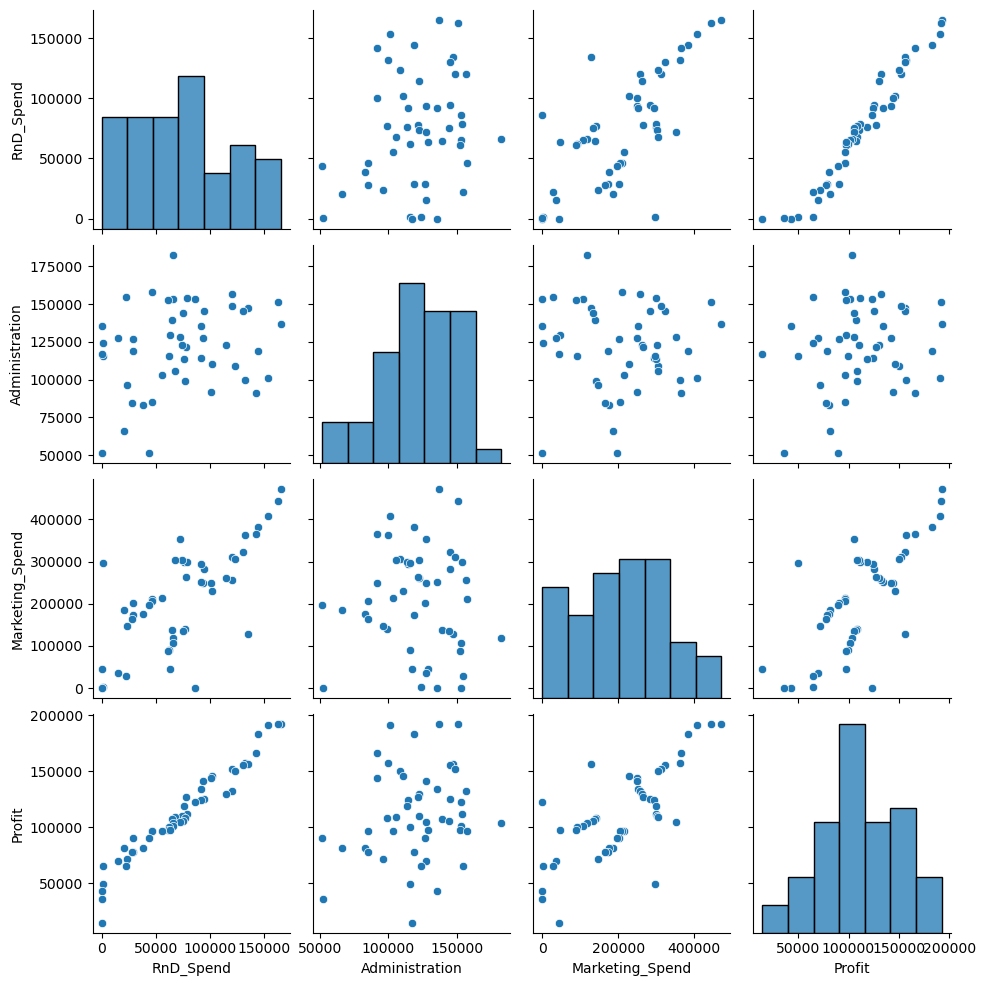

In [88]:
#Here we are stilltaking the data1 where we did not yet removed the outliers
#There we need to perform some validation techinques to check before removing outliers. 
sns.pairplot(data1)

As you can see there is linear relation between Profit and RnD_Spend

In [87]:
data1.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


As you can see there is Strong Correlation between Profit and RnD_Spend

Preparing the Model

In [89]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=data1).fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        18:40:52   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
model.params

Intercept          50122.192990
RnD_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [92]:
print(np.round(model.tvalues,3), '\n', np.round(model.pvalues,3))

Intercept           7.626
RnD_Spend          17.846
Administration     -0.526
Marketing_Spend     1.655
dtype: float64 
 Intercept          0.000
RnD_Spend          0.000
Administration     0.602
Marketing_Spend    0.105
dtype: float64


here p_value of Administration and Marketing_Spend are greater than 0.05 (accept null hypothesis) so these are not predictors of the data
So lets check by taking independently

In [93]:
model_adminstration = smf.ols('Profit~Administration',data=data1).fit()
model_adminstration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 27 Dec 2022   Prob (F-statistic):              0.162
Time:                        18:41:07   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
model_ms = smf.ols('Profit~Marketing_Spend',data=data1).fit()
model_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           4.38e-10
Time:                        18:41:17   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
model_admin_ms = smf.ols('Profit~Administration+Marketing_Spend',data=data1).fit()
model_admin_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           2.50e-10
Time:                        18:41:34   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculating VIF

In [99]:
rsq_RnD_Spend = smf.ols('RnD_Spend~Administration+Marketing_Spend',data=data1).fit().rsquared
vif_RnD_Spend = 1/(1-rsq_RnD_Spend)
rsq_Administration = smf.ols('Administration~RnD_Spend+Marketing_Spend',data=data1).fit().rsquared
vif_Adminstration = 1/(1-rsq_Administration)
rsq_Marketing_Spend = smf.ols('Marketing_Spend~RnD_Spend+Administration',data=data1).fit().rsquared
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend)

d1 = {'Variables':['RnD_Spend','Administration','Marketing_Spend'],'VIF':[vif_RnD_Spend,vif_Adminstration,vif_Marketing_Spend]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


plotting QQ plot
Test for Normality of Residuals

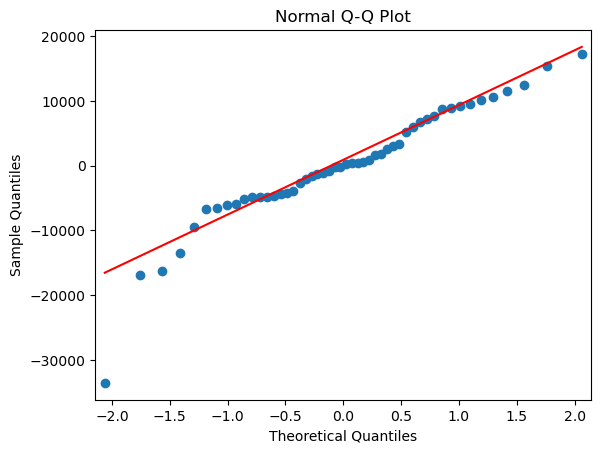

In [100]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot")
plt.show()

In [101]:
list(np.where(model.resid<-20000))

[array([49])]

Residual Plot for Homoscedacity or Hetroscedacity

In [102]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

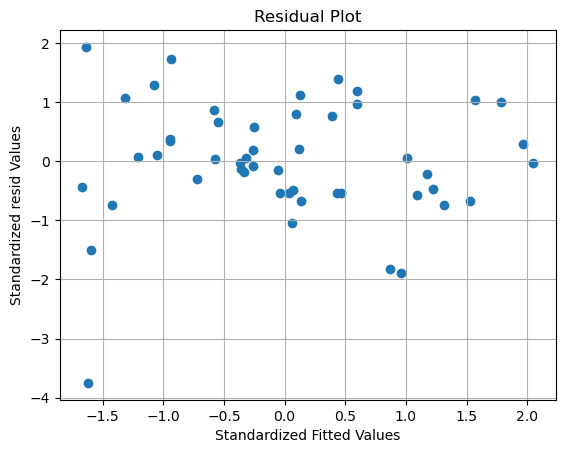

In [103]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.grid()
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized resid Values')
plt.show()

Residuals Vs Regressors

eval_env: 1


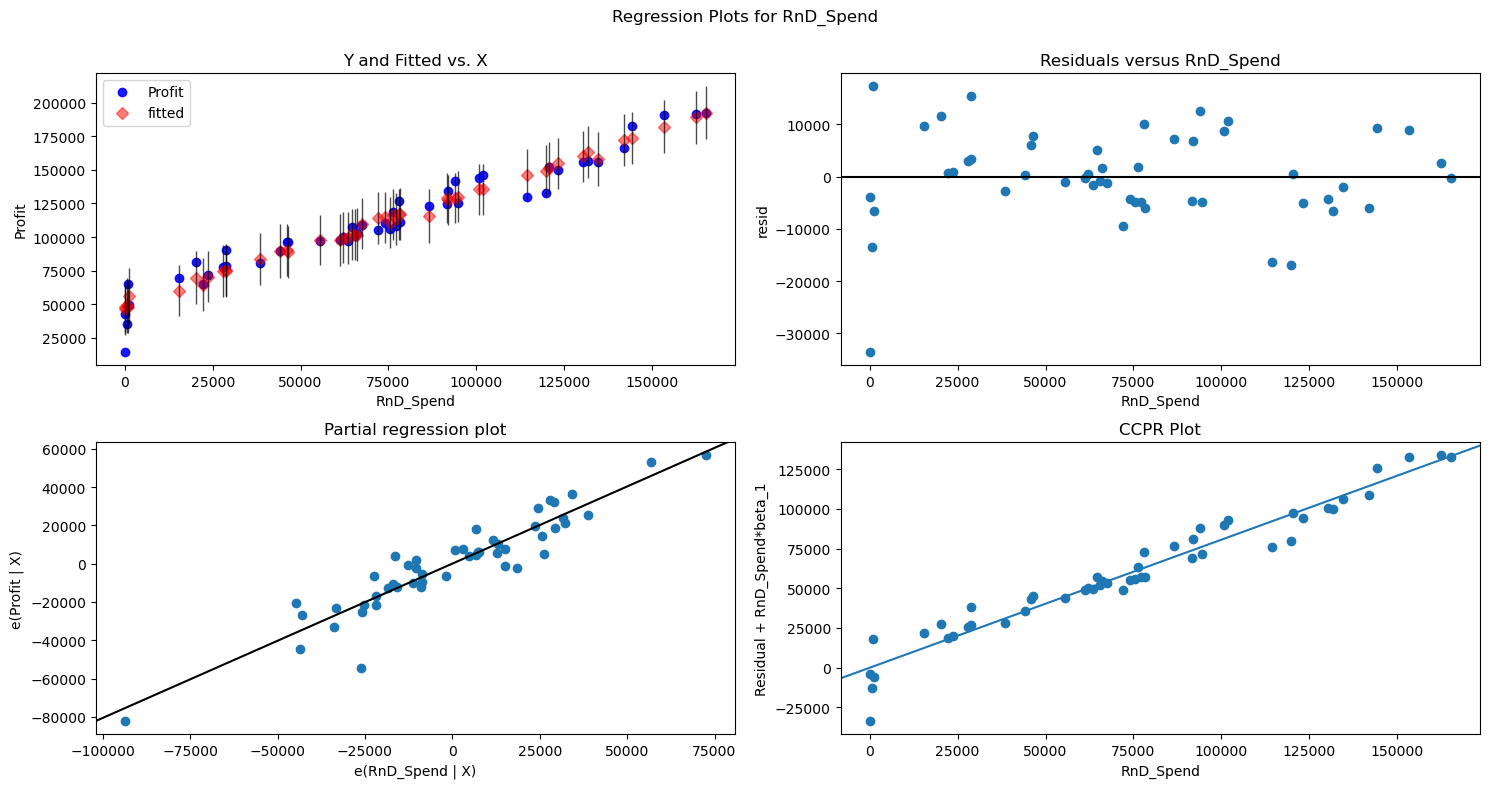

In [104]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RnD_Spend',fig=fig)
plt.show()

eval_env: 1


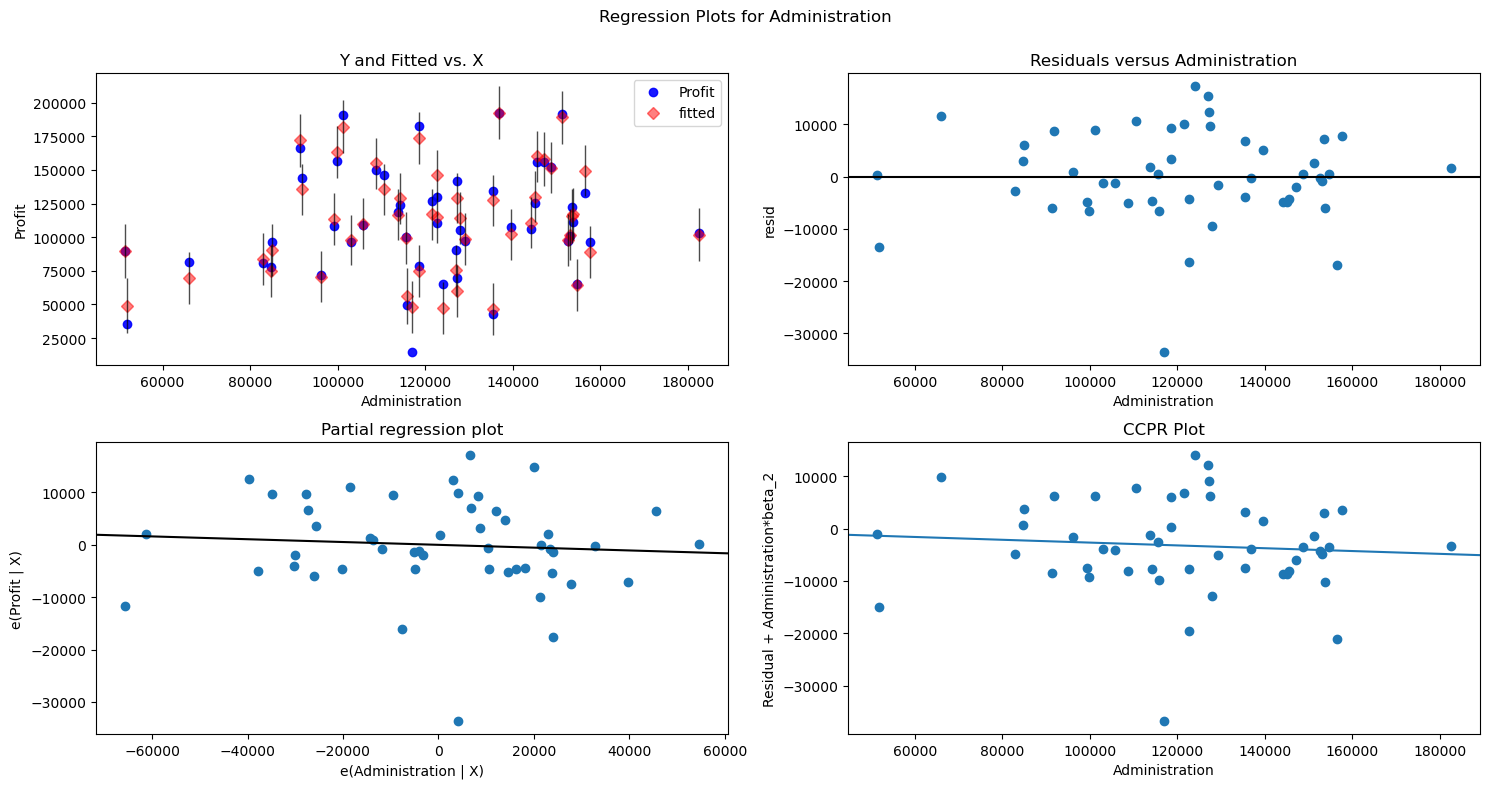

In [105]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


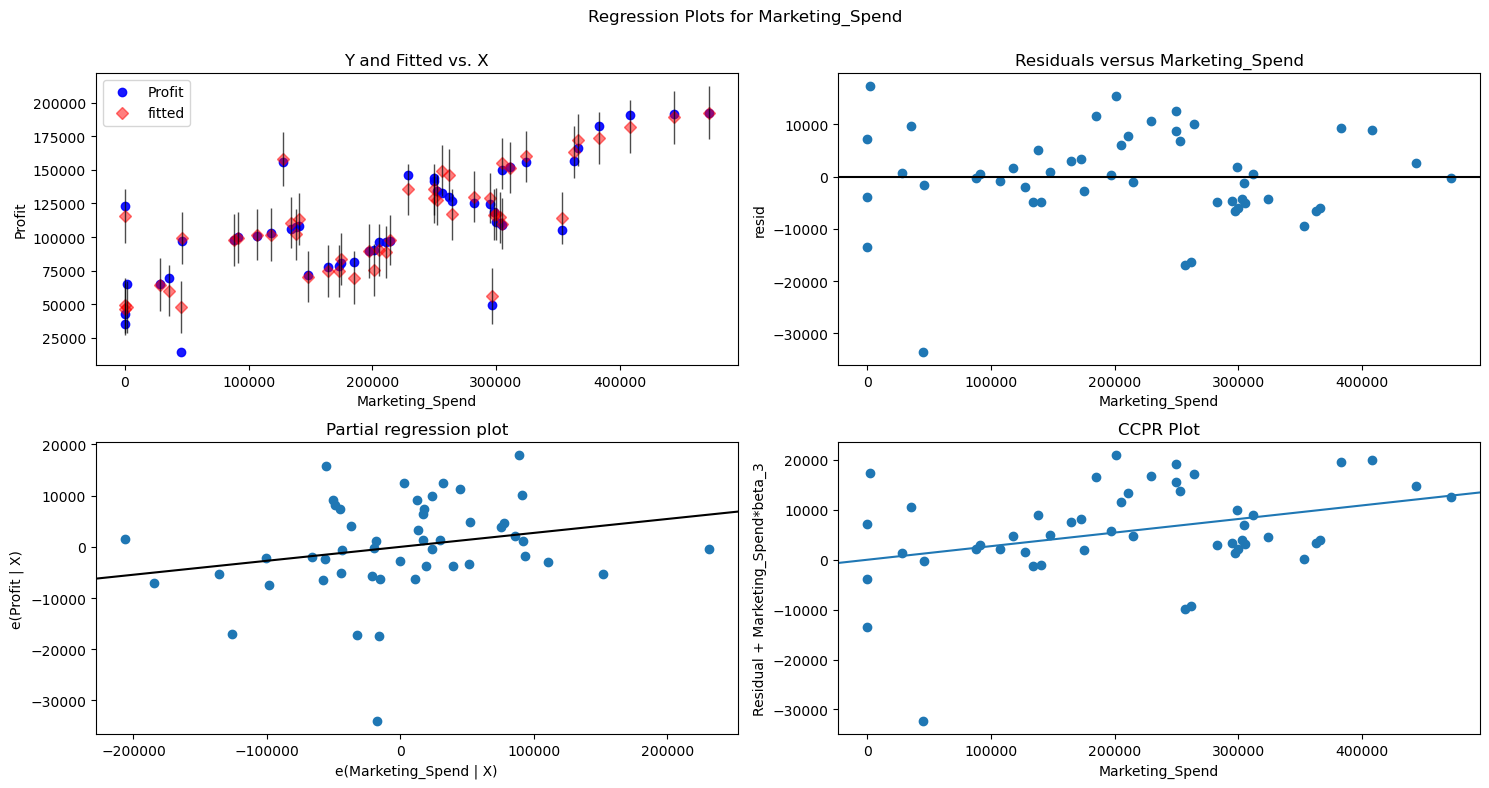

In [106]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

Model deletion diagnostics
Detecting Outliers Or Influencers

Cook's Distance

In [107]:
(c,_)= model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

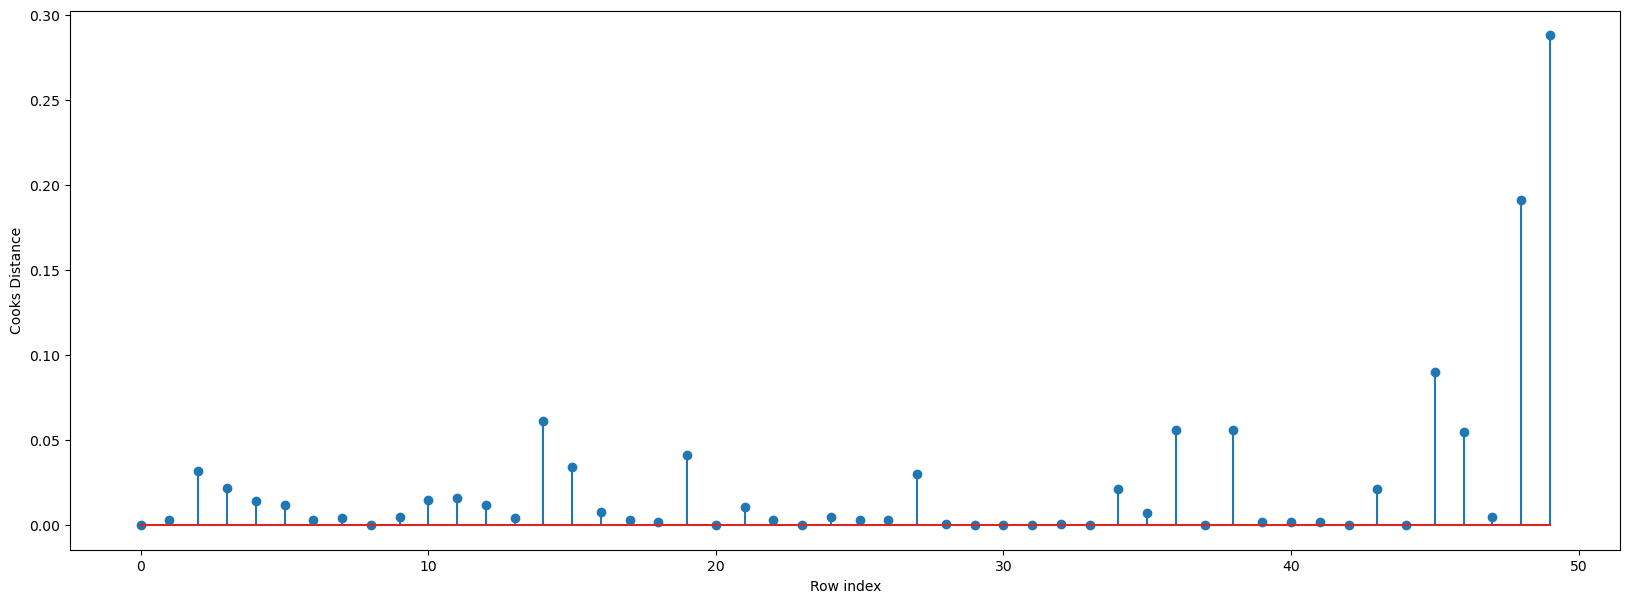

In [108]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [109]:
#getting influencer Value
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

High Influence Points

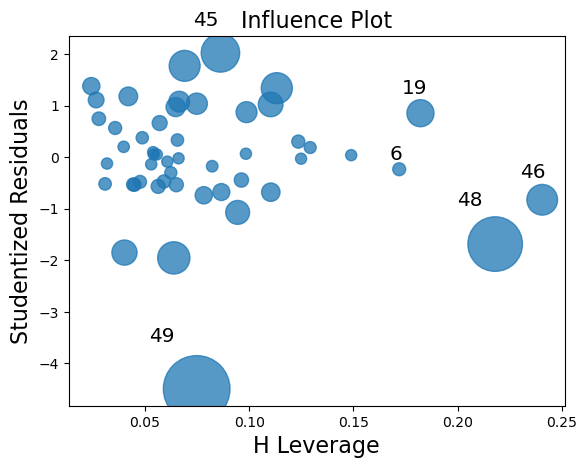

In [110]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

from diagram we can clearly say 49th is the most influence one
if leverage value is more than 3(k+1)/n then those are influencer values or outliers 
k = no of independent variables
n =. no of observations

In [115]:
n = data1.shape[0]
k = data1.shape[1]
levarage_cutoff = 3*((k+1)/n)
levarage_cutoff

0.36

In [117]:
data1[data1.index.isin([49])]

,RnD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


Improving the model

In [118]:
#using data2 where we already removed the most influnced observation
data2.tail()

,RnD_Spend,Administration,Marketing_Spend,Profit
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41


In [121]:
model2 = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           8.85e-32
Time:                        20:17:00   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD_Spend           0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
#When we tried with single linear model for both adminstration and marketing_spend above 
#we get the better r_Squared for MArketing_spend so trying that
model3 = smf.ols('Profit~RnD_Spend+Marketing_Spend',data=data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.74e-33
Time:                        20:24:46   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD_Spend           0.7754      0.035     22.136      0.000       0.705       0.846
Marketing_Spend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
(c,_)= model2.get_influence().cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

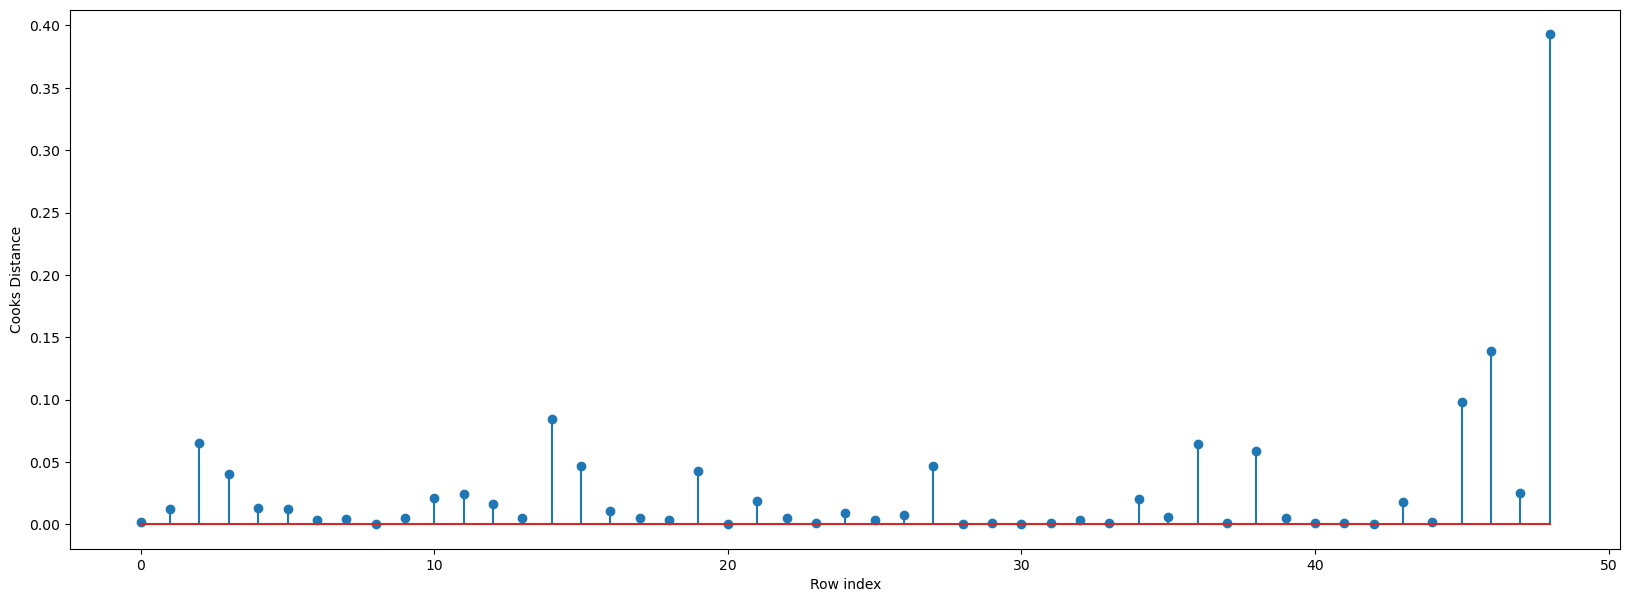

In [127]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [130]:
np.argmax(c),np.max(c)

(48, 0.39274420556321554)

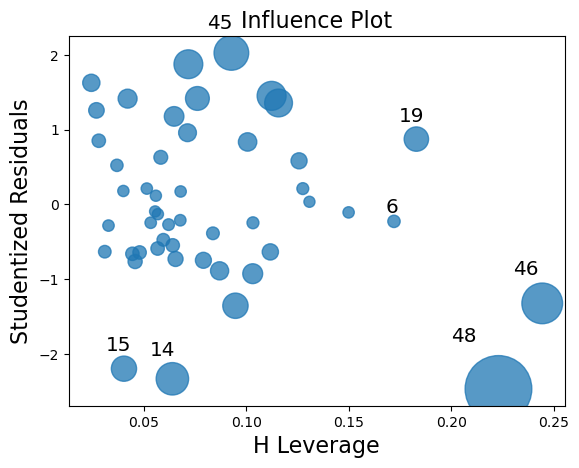

In [128]:
influence_plot(model2)
plt.show()

In [131]:
data3 = data2.drop(data2.index[[48]],axis=0)
data3

,RnD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [133]:
model4 = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=data3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           2.03e-31
Time:                        20:54:43   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RnD_Spend           0.7895      0.036     21.718      0.000       0.716       0.863
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
(c1,_)= model4.get_influence().cooks_distance
c1

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

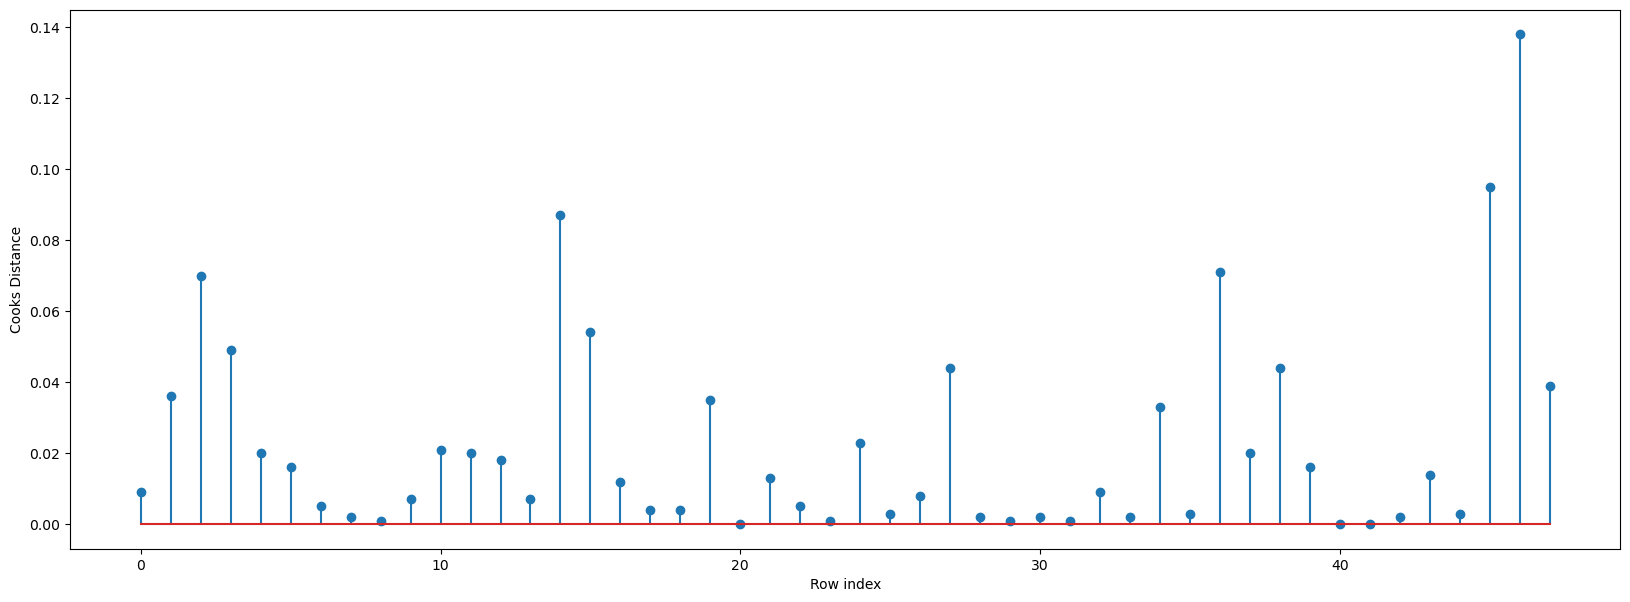

In [137]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c1,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

By seeing the above plot we can say no need to remove any further observation

In [139]:
#the final model is 
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           2.03e-31
Time:                        20:58:57   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RnD_Spend           0.7895      0.036     21.718      0.000       0.716       0.863
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
pred = model4.predict(data3)
pred


0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

In [142]:
data4 = data3.copy()
data4['Predicted_values'] = np.round(pred,2)
data4

,RnD_Spend,Administration,Marketing_Spend,Profit,Predicted_values
0,165349.20,136897.80,471784.10,192261.83,188939.28
1,162597.70,151377.59,443898.53,191792.06,185378.58
2,153441.51,101145.55,407934.54,191050.39,180724.35
3,144372.41,118671.85,383199.62,182901.99,172036.18
4,142107.34,91391.77,366168.42,166187.94,171688.34
5,131876.90,99814.71,362861.36,156991.12,163022.00
6,134615.46,147198.87,127716.82,156122.51,158209.61
7,130298.13,145530.06,323876.68,155752.60,158220.91
8,120542.52,148718.95,311613.29,152211.77,150109.70
9,123334.88,108679.17,304981.62,149759.96,154738.69


In [143]:
print(np.sqrt(model.mse_resid))

9232.334837002692


In [144]:
table_data={'Prep_Models':['Model_with_no_changes','model_with_changeinrows','model_with_selected_featured','Final_Model'],'Rsquared':[model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared],
            'RMSE':[np.sqrt(model.mse_resid),np.sqrt(model2.mse_resid),np.sqrt(model3.mse_resid),np.sqrt(model4.mse_resid)]}
table=pd.DataFrame(table_data)
table

,Prep_Models,Rsquared,RMSE
0,Model_with_no_changes,0.950746,9232.334837
1,model_with_changeinrows,0.961316,7753.807752
2,model_with_selected_featured,0.961086,7691.884749
3,Final_Model,0.962677,7349.368691


Predicting for new data

In [145]:
new_data = pd.DataFrame({'RnD_Spend':10000,'Administration':8000,'Marketing_Spend':25000},index=[1])
new_data

,RnD_Spend,Administration,Marketing_Spend
1,10000,8000,25000


In [146]:
model4.predict(new_data)

1    66909.024738
dtype: float64